<h1>Worksheet 7</h1>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV


In [24]:
# Tasks To Do
# 3 Part 1: Regression Task (California Housing)
# 3.1 Task 1: Load and Split Dataset
# • Use the California Housing dataset from sklearn.datasets.
# • Split the dataset into **training (80%)** and **test (20%)** sets.
# This is How you can use inbuilt dataset from scikit learn.
# You are not allowed to do this for any assignment, this is only for class practice.

# Load the CSV file
data = pd.read_csv("california_housing.csv")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (455, 30)
Testing samples: (114, 30)


In [25]:
# 3.2 Task 2: Complete all the Task
# • Regression Task (California Housing):


# – Step 1: Baseline Model (No Regularization) Build a Linear Regression model without any regularization.

# ∗ Train the model on the training set.
# ∗ Observe the coefficients of the model.
# ∗ Compute the Mean Squared Error (MSE) on both training and test sets.
# ∗ This step helps to understand how a simple linear model behaves on the dataset and serves as a baseline for comparison.

# Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Baseline Linear Regression")
print("\nTraining MSE:", train_mse)
print("Test MSE:", test_mse)

# Coefficients
print("\nCoefficients:", lr.coef_)


Baseline Linear Regression

Training MSE: 0.051601906634910176
Test MSE: 0.06410886247029465

Coefficients: [ 1.97130218e-01 -2.79472278e-03 -2.27758664e-02 -3.28622398e-04
  4.11490191e-01  5.00171192e+00 -1.00587030e+00 -4.91570446e+00
  3.38393701e-01 -5.81425644e+00 -4.32261922e-01  1.26325368e-02
  8.24736376e-03  1.24507529e-03 -1.80785086e+01  2.20798677e+00
  4.27375913e+00 -1.81589526e+01  1.19449435e+00  3.01203668e+00
 -2.14438989e-01 -9.61718848e-03  8.71176397e-03  9.61253395e-04
 -1.32384962e-01 -7.62670138e-01 -6.15742798e-01  1.32619828e+00
 -1.02113249e+00 -1.27363832e+00]


In [26]:
# – Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for Ridge and Lasso regression models.
    
# ∗ Define a grid of alpha values (regularization strength).
# ∗ Run cross-validation on the training set to find the optimal alpha.
# ∗ Evaluate the model performance on the test set using MSE.
# ∗ This step demonstrates the importance of selecting appropriate hyperparameters to improvegeneralization.

alpha_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Regression (L2)
ridge = Ridge()

ridge_cv = GridSearchCV(
    ridge,
    alpha_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_cv.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_cv.best_params_['alpha'])


# Lasso Regression (L1)
lasso = Lasso(max_iter=10000)

lasso_cv = GridSearchCV(
    lasso,
    alpha_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

lasso_cv.fit(X_train, y_train)

print("Best Lasso Alpha:", lasso_cv.best_params_['alpha'])

Best Ridge Alpha: 0.01
Best Lasso Alpha: 0.001


In [27]:
# – Step 3: Regularization Experiments (L1 vs L2) Train L1 (Lasso) and L2 (Ridge) regression models using the optimal hyperparameters.

# ∗ Compare the coefficients learned by both models. Notice that L1 tends to produce sparse coefficients (some set to zero), 
# while L2 shrinks coefficients without zeroing them.
# ∗ Evaluate and compare the MSE on training and test sets.
# ∗ Discuss the effect of regularization on the bias-variance tradeoff:
# · How L1/L2 reduces variance and prevents overfitting.
# · How excessive regularization may increase bias and underfit the data.
# ∗ Visualize the effect by plotting coefficients or training/test error versus alpha values (optional but recommended).


best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

# Predictions
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)

lasso_train_pred = best_lasso.predict(X_train)
lasso_test_pred = best_lasso.predict(X_test)

# MSE
print("Ridge Regression")
print("Train MSE:", mean_squared_error(y_train, ridge_train_pred))
print("Test MSE:", mean_squared_error(y_test, ridge_test_pred))

print("\nLasso Regression")
print("Train MSE:", mean_squared_error(y_train, lasso_train_pred))
print("Test MSE:", mean_squared_error(y_test, lasso_test_pred))


Ridge Regression
Train MSE: 0.05360529626799607
Test MSE: 0.05759255656804949

Lasso Regression
Train MSE: 0.06177804000058403
Test MSE: 0.060074743815891216


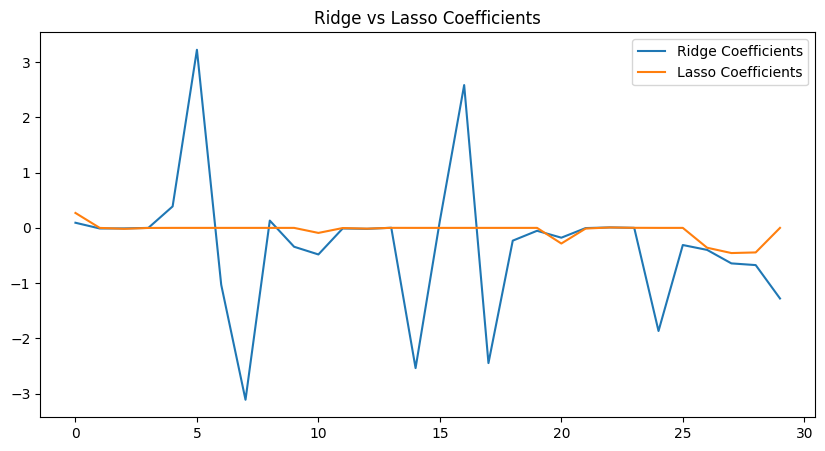

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(best_ridge.coef_, label="Ridge Coefficients")
plt.plot(best_lasso.coef_, label="Lasso Coefficients")
plt.legend()
plt.title("Ridge vs Lasso Coefficients")
plt.show()

In [29]:
# 4 Part 2: Classification Task (Breast Cancer)

# 4.1 Task 1: Load and Split Dataset

# • Use the Breast Cancer dataset from sklearn.datasets.
# • Treat it as a binary classification task.
# • Split into training (80%) and test (20%) sets.

# Load Breast Cancer Dataset for Classification:

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (455, 30)
Testing samples: (114, 30)


In [30]:
# 4.2 Task 2: Complete all the Task

# • Classification Task (Diabetes):

# – Step 1: Baseline Model (No Regularization) Build a Logistic Regression model without specifying any regularization (default settings).

# ∗ Train the model on the training set.
# ∗ Observe the coefficients of the model.
# ∗ Compute the accuracy on both training and test sets.
# ∗ This step serves as a baseline for comparison and helps to understand the behavior of a standard logistic regression model on the dataset.

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
train_pred = log_reg.predict(X_train)
test_pred = log_reg.predict(X_test)

# Accuracy
print("Baseline Logistic Regression")
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

# Coefficients
print("Coefficients shape:", log_reg.coef_.shape)


Baseline Logistic Regression
Training Accuracy: 0.9626373626373627
Test Accuracy: 0.956140350877193
Coefficients shape: (1, 30)


In [39]:
# – Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune hyperparameters 
#     for logistic regression models with regularization.

# ∗ Focus on tuning the C parameter (inverse of regularization strength) and the penalty type (l1 or l2).
# ∗ Run cross-validation on the training set to identify the optimal hyperparameters.
# ∗ Evaluate the model performance on the test set using accuracy.
# ∗ This step demonstrates the importance of hyperparameter selection for improving model generalization.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 1],  # 0 = L2, 1 = L1
    'solver': ['saga'],  # saga supports elasticnet
    'max_iter': [10000]  # keep high for convergence
}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(
    logreg,
    param_grid,
    cv=5,
    scoring='accuracy'
)

logreg_cv.fit(X_train, y_train)

print("Best Parameters:", logreg_cv.best_params_)

Best Parameters: {'C': 0.01, 'l1_ratio': 1, 'max_iter': 10000, 'solver': 'saga'}


In [40]:
# – Step 3: Regularization Experiments (L1 vs L2) Train separate logistic regression models
# using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters.

# ∗ Compare the coefficients for L1 and L2. Observe that L1 tends to produce sparse coefficients
# (some exactly zero), whereas L2 shrinks all coefficients but rarely sets them exactly to zero.
# ∗ Evaluate and compare accuracy on training and test sets.
# ∗ Discuss the effect of regularization on the bias-variance tradeoff:
# · How L1/L2 reduces variance and mitigates overfitting.
# · How overly strong regularization may increase bias, reducing accuracy.

# ∗ Optional: Visualize the coefficients or plot accuracy vs C values to better understand the impact of L1 and L2 regularization.

best_logreg = logreg_cv.best_estimator_

train_pred = best_logreg.predict(X_train)
test_pred = best_logreg.predict(X_test)

print("Best Logistic Regression")
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))


Best Logistic Regression
Training Accuracy: 0.9164835164835164
Test Accuracy: 0.9649122807017544


In [41]:
# L1 model
l1_model = LogisticRegression(
    solver='saga',
    C=logreg_cv.best_params_['C'],
    l1_ratio=1,
    max_iter=10000
)
l1_model.fit(X_train, y_train)

# L2 model
l2_model = LogisticRegression(
    solver='saga',
    C=logreg_cv.best_params_['C'],
    l1_ratio=0,
    max_iter=10000
)
l2_model.fit(X_train, y_train)

import numpy as np
print("Zero coefficients in L1:", np.sum(l1_model.coef_ == 0))
print("Zero coefficients in L2:", np.sum(l2_model.coef_ == 0))


Zero coefficients in L1: 25
Zero coefficients in L2: 0
